In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.dropna(inplace=True)

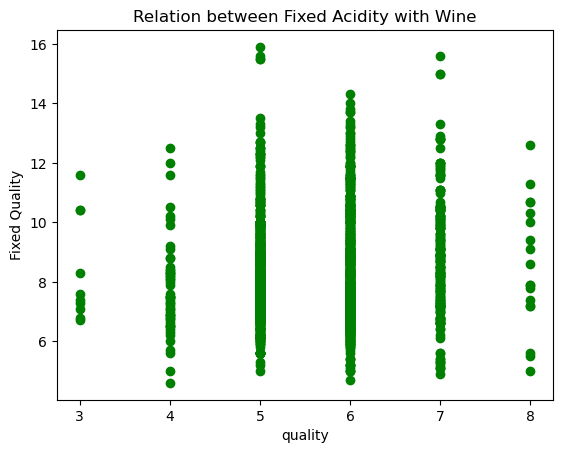

In [9]:
plt.scatter(df['quality'],df['fixed acidity'], color = 'green')
plt.title("Relation between Fixed Acidity with Wine")
plt.xlabel('quality')
plt.ylabel('Fixed Quality')
plt.show()

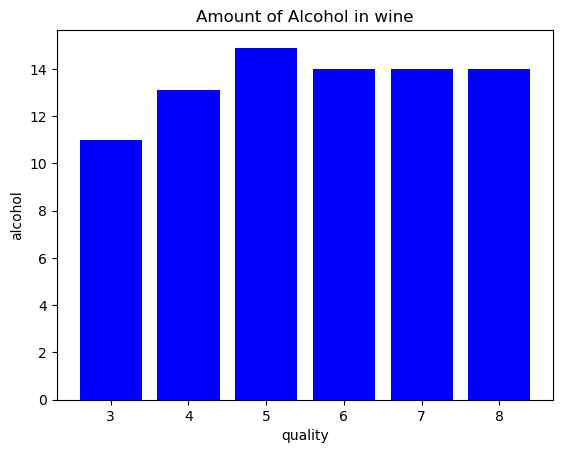

In [10]:
plt.bar(df['quality'],df['alcohol'], color = 'blue')
plt.title('Amount of Alcohol in wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

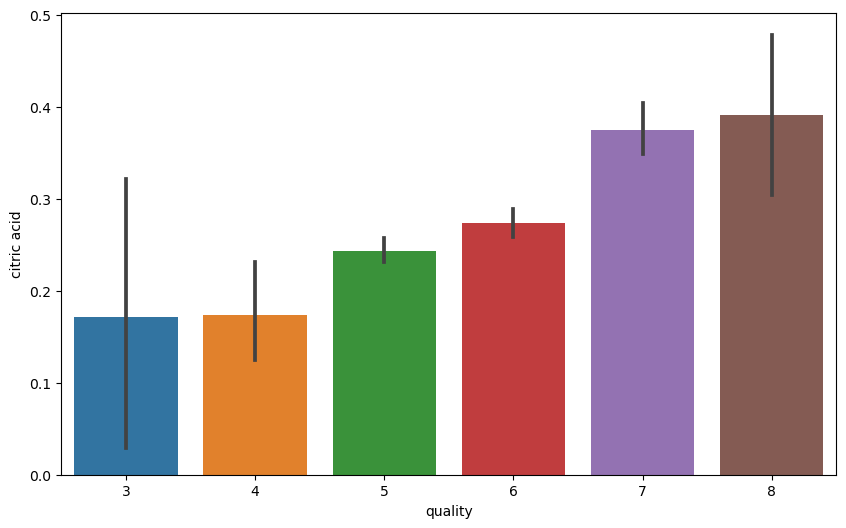

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.show()

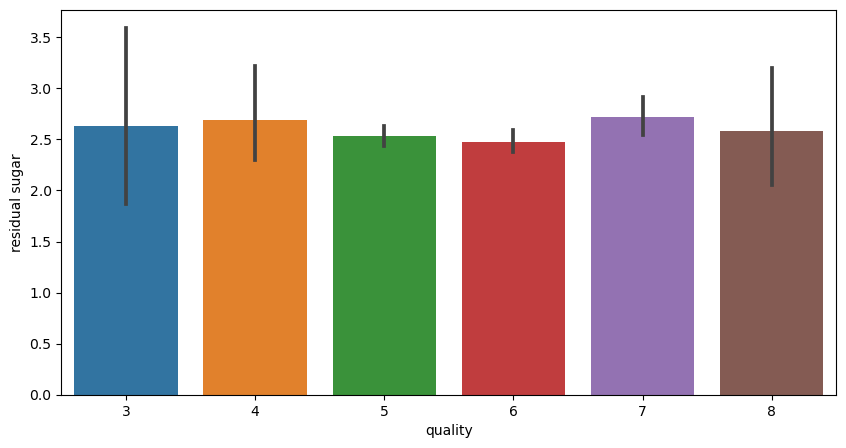

In [12]:
fig = plt.figure(figsize= (10,5))
sns.barplot(x ='quality', y = 'residual sugar', data = df)
plt.show()

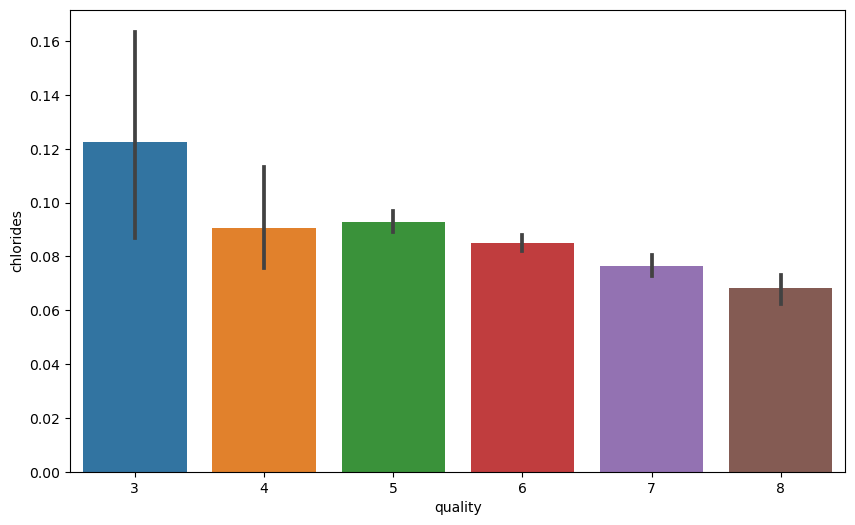

In [13]:
fig = plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data= df)
plt.show()

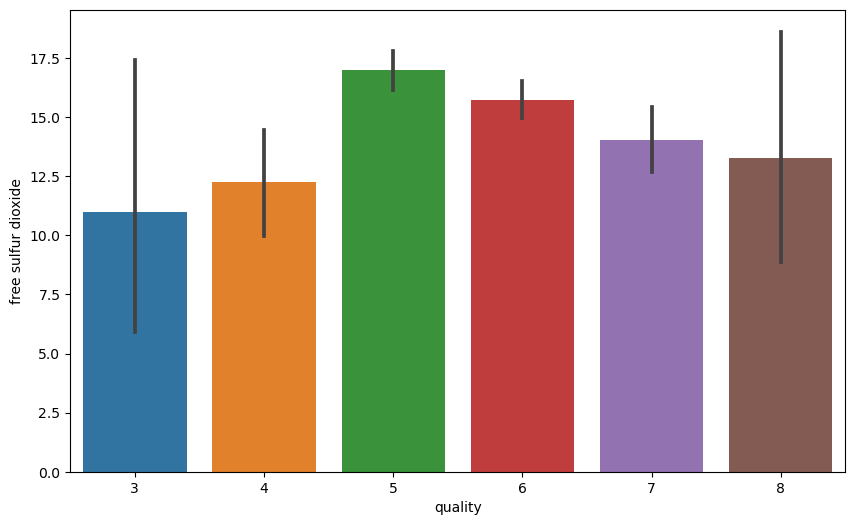

In [14]:
fig = plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data= df)
plt.show()

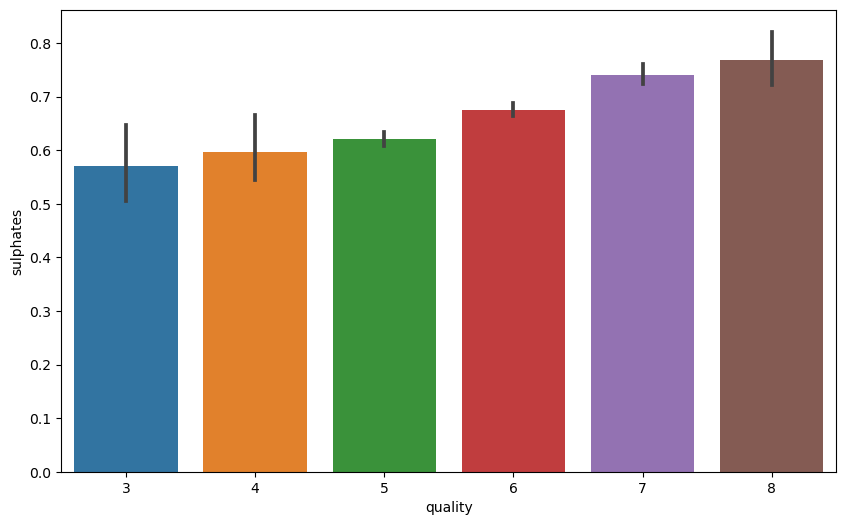

In [15]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'sulphates', data= df)
plt.show()

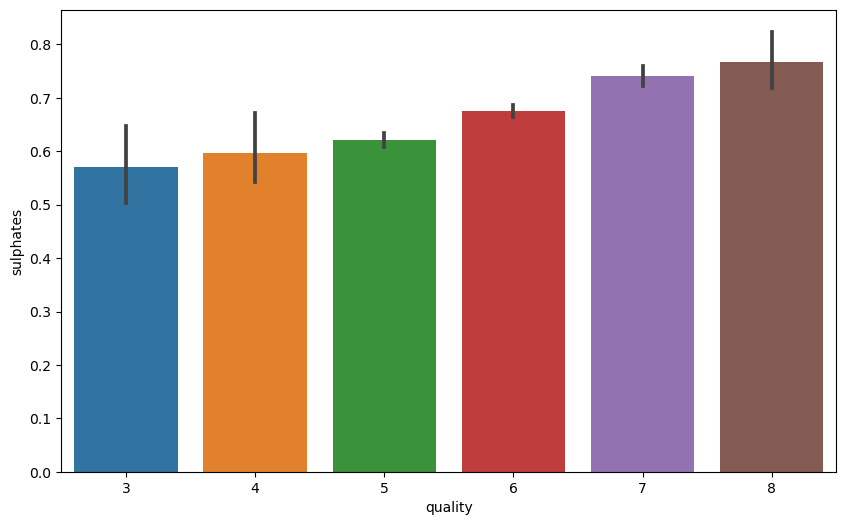

In [16]:
fig = plt.figure(figsize= (10, 6))
sns.barplot(x ='quality', y = 'sulphates', data = df)
plt.show()

<Axes: >

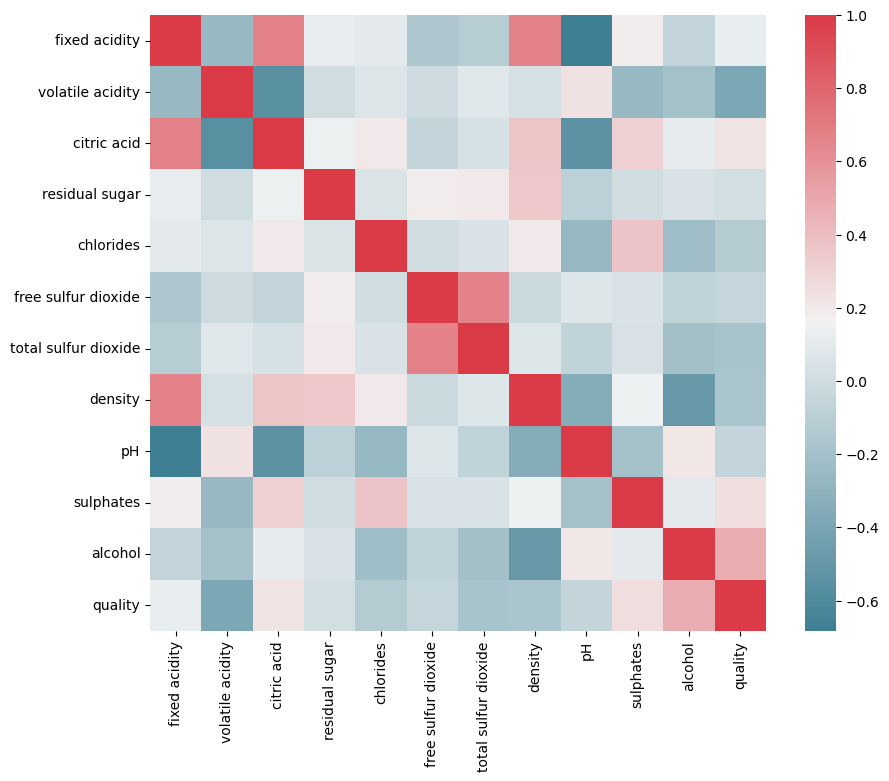

In [17]:
f,ax= plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
     

In [18]:
#sns.pairplot(df)
#plt.show()

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
df['quality'] = df['quality'].map({3 : 'bad', 4 : 'bad', 5 : 'bad', 6 : 'good', 7 : 'good', 8 : 'good'})

In [21]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32>

In [24]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


In [26]:
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
model.score(X_train, y_train)

0.29748897811047126

In [30]:
model.score(X_test, y_test)

0.2848888260533772

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
model2 = DecisionTreeRegressor(max_depth = 3)

In [33]:
model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [34]:
model2.score(X_train, y_train)

0.3034206744760489

In [35]:
model.score(X_test, y_test)

0.2848888260533772

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model3=LogisticRegression(solver="lbfgs")## the model will work fine even without the solver function
model3.fit(X_train, y_train)
model3

LogisticRegression()

In [38]:
model3.score(X_train, y_train)

0.7498045347928068

In [39]:
model3.score(X_test, y_test)

0.740625

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model4 = DecisionTreeClassifier(max_depth=3, criterion = "entropy")

In [42]:
model4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
model4.score(X_train, y_train)

0.7294761532447225

In [44]:
model4.score(X_test, y_test)

0.715625

In [45]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=150, base_estimator = model4, random_state=0)
bgcl= bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test, y_test))
print(bgcl.score(X_train, y_train))

0.728125
0.7615324472243941


In [46]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120, random_state=0, learning_rate = 3.0, algorithm = 'SAMME')
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))
print(abcl.score(X_train, y_train))

0.68125
0.6927286942924159


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0, max_features=3, max_depth = 3)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
print(rfcl.score(X_train, y_train))

0.74375
0.7818608287724785
